In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
plt.style.use(['science', 'notebook'])

# An Initial Problem

Suppose I have a set of numbers $\vec{p} = [1,3,5,2...]$ of length $N$. I want to know what the corresponding matching set of numbers $\vec{q}=[q_1,q_2,q_3,...]$ is such that the following function is minimized:

$$H(\vec{p},\vec{q}) = -\sum_{i=1}^N p_i \ln(q_i)$$

with the constraint that $\sum_i p_i = \sum_i q_i$

In [2]:
p = np.array([5,1,4,6,2,4])
q1 = p
q2 = np.array([3,7,1,4,1,6])
q3 = np.array([2,5,7,2,1,5])

In [3]:
-sum(p*np.log(q3))

-23.455449144551153

It turns out that the set of numbers that maximizes this is exactly $q=p$. We can prove this. We want to maximize a function with respect to a constraint, so this is a Lagrange Multiplier problem. We want to find the stationary points of

$$f(\vec{q},\lambda) \equiv -\sum_{i=1}^N p_i \ln(q_i) - \lambda \left(\sum_i p_i - \sum_i q_i\right)$$

We set the derivative with respect to each $q_i$ equal to zero, and also the derivative WRT $\lambda$

$$\frac{\partial f}{\partial q_i} = -\frac{p_i}{q_i} + \lambda \to =0$$
$$\frac{\partial f}{\partial \lambda} = \left(\sum_i p_i - \sum_i q_i\right) \to =0$$

From this we get two equations

* $p_i = \lambda q_i \implies \sum p_i = \lambda \sum q_i$
* $\sum p_i = \sum q_i$

These can only both be true if $\lambda=1$, so therefore we must have $q_i=p_i$ and thus $\boxed{\vec{q}=\vec{p}}$

(**Aside**: This also works for functions as well. In this case, rather than having $\vec{q}$ and $\vec{p}$ where $\sum_i q_i = \sum_i p_i$, we instead have $\int_{-\infty}^{\infty} p(x) dx = \int_{-\infty}^{\infty} q(x) dx$. The function $q(x)$ that minimizes $\int_{-\infty}^{\infty} p(x)\ln(q(x)) dx$ is precisely $q(x)=p(x)$. To prove this, one needs calculus of variations: see my instagram. This is why this function represents "cross" entropy as it corresponds to a way to measure the difference of a measured function $q$ with respect to a known function $p$).

# Cross Entropy Loss

In classification problems, an input is taken in, such as an image. We'll call this $x$.  This image may, for example, contain 1 of 5 different objects (dog, cat, house, ...). We'll call the **true** likelihood of an image $x$ belonging to class $i$ as $p_i$ The goal of a classifier is to create a function $f$ such that

$$f(x) = \vec{q}$$

where $\vec{q}$ is as close to $\vec{p}$ as possible

* Note that $\vec{p}$ and $\vec{q}$ are probability mass functions, and each element of the vector represents a different class. It follows that $\sum p_i = \sum q_i = 1$. This is the constraint we had in the Lagrange Multiplier problem above.
* Typically we know what class $\tilde{c}$ an image $x$ belongs to. In this case, its typically the case that $p_{\tilde{c}}=1$ for the class $i=\tilde{c}$ that we know it is, and all the other $p_i$s are equal to 0.

<p align="center">
  <img src="../images/CE.PNG" alt="drawing" width="800" align="center"/>
</p>

To minimize the difference between $\vec{p}$ and $\vec{q}$, we can minimize the following loss function:

$$H(p,q) = -\sum_{i} p_i \ln(q_i)$$

Since the minimum of this function occurs precisely when $q_i=p_i$ for all $i$. In the case where we know which class an image belongs to (i.e. one of the $p_i$s is 1, the rest are 0) we have:

$$H(p,q) =  - \ln(q_{\tilde{c}}) $$

In [4]:
p = np.zeros(10, dtype=int); p[4]=1
q = np.random.rand(10)
q = q/sum(q)

In [5]:
p

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [6]:
q[p>0]

array([0.02552522])

In [7]:
q

array([0.085644  , 0.1456686 , 0.16376579, 0.13549867, 0.02552522,
       0.02197793, 0.09361131, 0.13620394, 0.12284298, 0.06926156])

In [8]:
H = -np.log(q[p>0])
H

array([3.66808833])

What if we make the probability higher at this point?

In [9]:
q

array([0.085644  , 0.1456686 , 0.16376579, 0.13549867, 0.02552522,
       0.02197793, 0.09361131, 0.13620394, 0.12284298, 0.06926156])

In [10]:
q[4] = 20
q = q/sum(q) #renormalize
H = -np.log(q[p>0])
H

array([0.04757394])

What if we change other locations?

In [11]:
q[3] = 0
q = q/sum(q) #renormalize
H = -np.log(q[p==1])
H

array([0.04109281])

## For Multiple Images

In this case, consider us computing this loss over $N$ images (multiple images $x_n$). Suppose also that we know exactly what class the image belongs to. We can thus express the true class of the $n$th image as $\tilde{c}(n)$. We will express the probability of image $n$ belonging to class $c$ as $q_n(c)$.

* Thus the **predicted** probability of the image $x_n$ beloning to its true class $\tilde{c}(n)$ is $q_n(\tilde{c}(n))$


We sum it together:

$$L(p,q) \equiv \sum_{n=1}^N H(p_n, q_n) = - \sum_{n=1}^N \ln(q_n(\tilde{c}(n))$$


Get a sample array of $p$s

In [12]:
p = np.zeros((4,10), dtype=int)
p[0][4] = 1
p[1][2] = 1
p[2][8] = 1
p[3][6] = 1

Show:

In [13]:
p

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

Create probability array of $q$s:

In [14]:
q = np.random.rand(40).reshape(4,10)
q = q/np.expand_dims(np.sum(q, axis=1), axis=1)

In [15]:
q

array([[0.06765434, 0.07130398, 0.19081112, 0.09255784, 0.15027518,
        0.14574716, 0.02229239, 0.07654732, 0.12459496, 0.05821573],
       [0.0618959 , 0.15315819, 0.04885824, 0.12177228, 0.07094866,
        0.05305005, 0.11861736, 0.15279449, 0.12198715, 0.09691769],
       [0.19906666, 0.17688986, 0.16833953, 0.05033974, 0.05159688,
        0.02048319, 0.06079866, 0.1269126 , 0.05722812, 0.08834477],
       [0.11066453, 0.14835533, 0.09342153, 0.10261266, 0.16862268,
        0.12577825, 0.04453222, 0.15300592, 0.01444318, 0.03856371]])

Compute $H$ for each term in the sum and then sum together to get $L$:

In [16]:
q[p>0]

array([0.15027518, 0.04885824, 0.05722812, 0.04453222])

In [17]:
Hs = -np.log(q[p>0])
L = sum(Hs)

In [18]:
Hs

array([1.89528717, 3.01883223, 2.86070987, 3.1115424 ])

In [19]:
L

10.886371675818454

## How Do We Get The $q$'s in Machine Learning?

$\vec{q}$ should be *related* to a probability density function
* Bounded between 0 and 1
* The closer to 0, the less likely we are confident that image $n$ is class $c$
* The closer to 1, the more likely we are confident that image $n$ is class $c$
* $\sum_{c=0}^C q_{c} = 1$ for each image (we enforced this above in a different way)

Suppose a neural network outputs $f(x_n)=\hat{y}_n$ where $\hat{y}_n$ is a vector with the same length as the number of classes, but $\hat{y}_n$ is not normalized like $\vec{q}$ should be. We can enforce the last condition by normalizing the following way:

$$q_n(c) = \frac{\exp{\left(\hat{y}_n(c)\right)}}{\sum_{c'=0}^C \exp{\left(\hat{y}_n(c')\right)}}$$

So we can write our loss as

$$L(\hat{y}) = - \sum_{n=0}^N \ln \left( q_n(\tilde{c}(n))\right) = - \sum_{n=0}^N \ln \left( \frac{\exp{\left(\hat{y}_n( \tilde{c}(n))\right)}}{\sum_{c=0}^C  \exp{\left(\hat{y}_n(c)\right)}} \right) $$

* Note that for a given $n$, $\hat{y}_n(c)$ is the network output for image $x_n$. It is a vector of length 10 (network outputs 10 numbers per image).


Get sample $\hat{y}$

In [20]:
yhat = 20*np.random.rand(40).reshape(4,10) **2

In [21]:
yhat

array([[1.07823548e+01, 5.41394743e+00, 1.64258910e+01, 1.46177201e+01,
        5.89503475e-05, 1.30116240e+01, 3.97849183e-01, 1.01915309e+01,
        4.60237548e+00, 5.70470477e+00],
       [5.58904314e-01, 4.44651946e+00, 4.27462801e-02, 5.25541209e-03,
        1.27760614e+01, 1.31302736e-01, 1.96201031e+01, 7.68991853e+00,
        7.13328944e+00, 2.50084711e-01],
       [3.96237534e+00, 3.50997745e-02, 7.75234304e-01, 1.08733013e+01,
        6.79142581e+00, 1.02173657e+01, 1.79950095e-01, 1.16216481e+00,
        1.74988388e+01, 2.68058096e-01],
       [1.58498552e+01, 7.25037613e+00, 3.50683279e+00, 1.18021174e+01,
        5.99484307e+00, 4.82273118e-01, 1.01745449e+01, 3.63500115e-02,
        4.84083288e+00, 4.04880989e+00]])

The first axis is WRT to $n$, the second axis is WRT $C$:

In [22]:
yhat.shape

(4, 10)

Compute the $q$s from the exponential fraction above:

* This is a bit tricky, follow carefully:

In [23]:
q = np.exp(yhat)
q = q/np.expand_dims(np.sum(q, axis=1), axis=1)

Show they are normalized:

In [24]:
q.sum(axis=1)

array([1., 1., 1., 1.])

Compute $\tilde{c}(n)$:

* Again, this is tricky, follow carefully

In [25]:
p

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [26]:
q

array([[2.94437997e-03, 1.37253730e-05, 8.31668913e-01, 1.36355236e-01,
        6.11367379e-08, 2.73623344e-02, 9.10039756e-08, 1.63080600e-03,
        6.09625231e-06, 1.83568629e-05],
       [5.26452671e-09, 2.56879319e-07, 3.14191728e-09, 3.02630482e-09,
        1.06464113e-03, 3.43284605e-09, 9.98924730e-01, 6.58141771e-06,
        3.77205933e-06, 3.86581159e-09],
       [1.31918092e-06, 2.59842540e-08, 5.44686480e-08, 1.32337022e-03,
        2.23329127e-05, 6.86771355e-04, 3.00343300e-08, 8.02025878e-08,
        9.97965983e-01, 3.28006739e-08],
       [9.79281461e-01, 1.80385334e-04, 4.26973586e-06, 1.71000491e-02,
        5.13960978e-05, 2.07420384e-07, 3.35854826e-03, 1.32797375e-07,
        1.62087636e-05, 7.34139637e-06]])

In [27]:
c_squig = np.where(p)
c_squig

(array([0, 1, 2, 3], dtype=int64), array([4, 2, 8, 6], dtype=int64))

Compute the loss function:

In [28]:
Hs = -np.log(q[c_squig])
L = sum(Hs)
L

41.8868680503028

# Proof This is Equivalent to PyTorch

Create loss function

In [29]:
L = torch.nn.CrossEntropyLoss(reduction='sum')

Evaluate on data above:

In [30]:
L(torch.tensor(yhat), torch.tensor(p, dtype=torch.float))

tensor(41.8869, dtype=torch.float64)

# Image Segmentation

Suppose we want to segment the image into three distinct regions: cat, couch, and background:

<p align="center">
  <img src="../images/cat.PNG" alt="drawing" width="200" align="center"/>
</p>

For each pixel in the image, we thus have

* $\vec{p} = [1,0,0]$ for background
* $\vec{p} = [0,1,0]$ for couch
* $\vec{p} = [0,0,1]$ for cat

For each pixel we also have a corresponding value of $\vec{q}$ for the probability that the pixel is one of the three objects. Then we can compute the cross entropy as normal, this time summing over pixels ($N$ is the total pixels in the image):

$$L(p,q) = - \sum_{n=1}^N \ln(q_n(\tilde{c}(n))$$

where 

$$q_n(c) = \frac{\exp{\left(\hat{y}_n(c)\right)}}{\sum_{c'=0}^C \exp{\left(\hat{y}_n(c')\right)}}$$

Load $\vec{p}$ for all pixels and plot

In [31]:
p = np.load('../images/cat_p.npy')

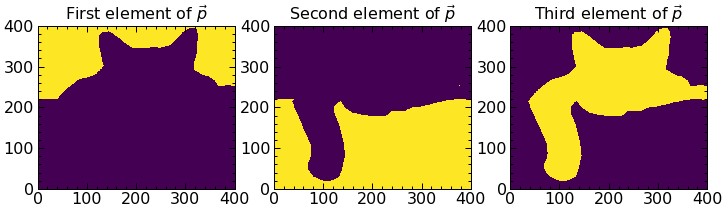

In [32]:
plt.subplots(1,3,figsize=(12,3))
plt.subplot(131)
plt.pcolormesh(p[:,:,0])
plt.title(r'First element of $\vec{p}$')
plt.subplot(132)
plt.pcolormesh(p[:,:,1])
plt.title(r'Second element of $\vec{p}$')
plt.subplot(133)
plt.pcolormesh(p[:,:,2])
plt.title(r'Third element of $\vec{p}$')
plt.show()

Load $\hat{y}$ for all pixels and plot:

In [33]:
yhat = np.load('../images/cat_q.npy')

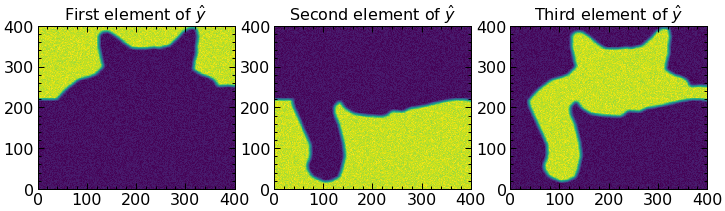

In [34]:
plt.subplots(1,3,figsize=(12,3))
plt.subplot(131)
plt.pcolormesh(yhat[:,:,0])
plt.title(r'First element of $\hat{y}$')
plt.subplot(132)
plt.pcolormesh(yhat[:,:,1])
plt.title(r'Second element of $\hat{y}$')
plt.subplot(133)
plt.pcolormesh(yhat[:,:,2])
plt.title(r'Third element of $\hat{y}$')
plt.show()

Normalize $\hat{y}$ to get $\vec{q}$

* **Note**: This was incorrect on youtube. We need `axis=-1` (on youtube I had `axis=1`)

In [35]:
q = np.exp(yhat)
q = q/np.expand_dims(np.sum(q, axis=-1), axis=-1)

Get $\tilde{c}(n)$ where $n$ specifies the particular pixel

In [36]:
c_squig = np.where(p)

In [37]:
c_squig

(array([  0,   0,   0, ..., 399, 399, 399], dtype=int64),
 array([  0,   1,   2, ..., 397, 398, 399], dtype=int64),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int64))

Compute loss

In [38]:
Hs = -np.log(q[c_squig])
L = sum(Hs)
L

99746.60685154534

Compare to pytorch

* **Note**: This was incorrect in the youtube video. The `yhat` and `p` fed into the loss function need to have shape `(B,C,H,W)` where $B$ is the batch size (1 single image fed in in our case) C is the number of classes, and H and W are the height and width of the images. I reshape them here:

In [39]:
yhat_ = np.expand_dims(np.transpose(yhat,(2,1,0)), axis=0)
p_ = np.expand_dims(np.transpose(p,(2,1,0)), axis=0)

In [40]:
yhat_.shape

(1, 3, 400, 400)

Compute the loss:

In [41]:
L = torch.nn.CrossEntropyLoss(reduction='sum')
L(torch.tensor(yhat_),
  torch.tensor(p_, dtype=torch.float))

tensor(99746.6069, dtype=torch.float64)